<a href="https://colab.research.google.com/github/Usama-zia/CE888-7-SP_2021_RegNo_2010999/blob/main/Lab6/Lab6_task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [3]:
df_country = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')

In [4]:
df_country.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
#removing country column as we dont need it for clustering
x=df_country.iloc[:,1:10]
df_country_name=df_country.iloc[:,:1]

In [8]:
print(x.columns)
print(df_country_name.columns)

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
Index(['country'], dtype='object')


#Clustering




In [9]:
km=cluster.KMeans(n_clusters=3)
km.fit(x)
km.labels_


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

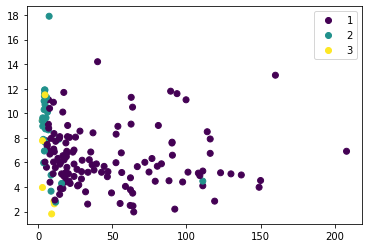

In [10]:
# Hint: use any two variables 
# Write your code here for task 3
classes = [1, 2, 3]
scatter = plt.scatter(x.values[:,0],x.values[:,2],c=km.labels_)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

#PCA

In [11]:
# adding labels found by clustring to the whole dataset
x['label']=km.labels_

In [19]:
# Now we have splitted the data into 70:30 training and test subsets, respectively.
from sklearn.model_selection import train_test_split
# Fetch data into x and y variables
X=x.iloc[:,0:8] # Covariates or input
y=x.iloc[:,9:10] # Labels or classes or output
print(x.columns)
print(y.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'label'],
      dtype='object')
Index(['label'], dtype='object')


In [22]:
# Standardizing the data
# Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as:
# z = (x - u) / s

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Dimensionality reduction: Principal component analysis using scikit-learn

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.46637438, 0.2054645 , 0.14133759, 0.08361147, 0.05120752,
       0.03166881, 0.01102582, 0.00930991])

##Apply PCA with `n_components=2` on `X_train_std` data and transform test data accordingly

In [26]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

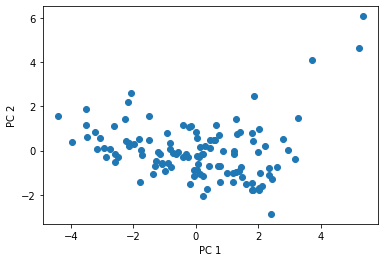

In [27]:
# Plot the first two principal components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig('PCA_WINE_ULBL.png', dpi=300)
plt.show()

###  Training logistic regression classifier using the first 2 principal components.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


In [30]:
lr = LogisticRegression()
lr = lr.fit(X_train_pca,y_train) # Train a Logistic regression model
pred_lab=lr.predict(X_test_pca) # Test on the test data
print("Accuracy on test is = %f" % (100 * accuracy_score(y_test, pred_lab)))

Accuracy on test is = 88.235294


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



First step was to delete the country column as we dont have any need for it.
Then on the rest of the data first I performed clustring using Kmeans and then merged the labels found by the clustring into the original dataset used for training. Afterwords I performed PCA for Dimensionaltiy reduction and then trained on logistric regression classifer and obtained accuracy of 88.23%.


#Final Result

In [38]:
x.insert(9, "country", df_country_name, True)

In [39]:
x.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,label
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Afghanistan,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Albania,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Algeria,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Angola,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Antigua and Barbuda,0
